In [1]:
!pip install yfinance pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enter the ticker symbol for the first asset: INTC
Enter the ticker symbol for the second asset: ^DJI
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


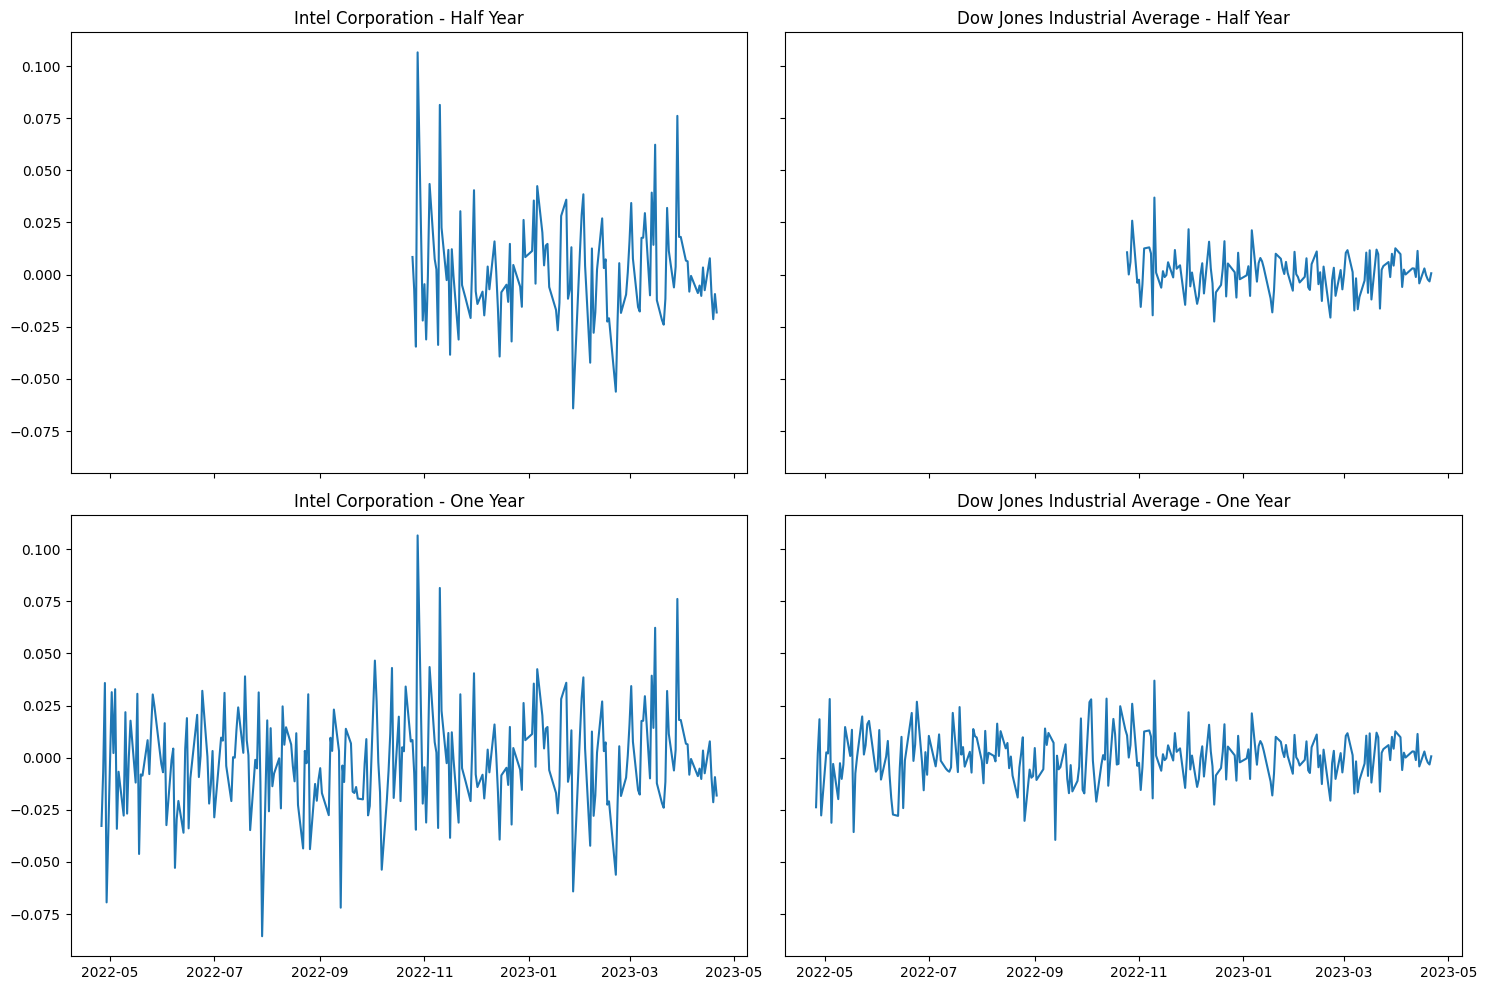

The correlation between Intel Corporation and Dow Jones Industrial Average for the past half year is 0.64.
The correlation between Intel Corporation and Dow Jones Industrial Average for the past one year is 0.7.


In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Get inputs from the user
ticker1 = input("Enter the ticker symbol for the first asset: ")
asset1 = yf.Ticker(ticker1).info['longName']

ticker2 = input("Enter the ticker symbol for the second asset: ")
asset2 = yf.Ticker(ticker2).info['longName']

# Set end date to today's date
end_date = datetime.today().strftime('%Y-%m-%d')

# Calculate start dates for two time frames
start_date_half_year = (datetime.today() - timedelta(days=182)).strftime('%Y-%m-%d')
start_date_one_year = (datetime.today() - timedelta(days=365)).strftime('%Y-%m-%d')

# Download the historical data of the two assets from Yahoo Finance for the two time frames
asset1_half_year = yf.download(ticker1, start=start_date_half_year, end=end_date)
asset2_half_year = yf.download(ticker2, start=start_date_half_year, end=end_date)

asset1_one_year = yf.download(ticker1, start=start_date_one_year, end=end_date)
asset2_one_year = yf.download(ticker2, start=start_date_one_year, end=end_date)

# Get the adjusted close prices of the two assets for the two time frames
asset1_half_year_returns = asset1_half_year['Adj Close'].pct_change()
asset2_half_year_returns = asset2_half_year['Adj Close'].pct_change()

asset1_one_year_returns = asset1_one_year['Adj Close'].pct_change()
asset2_one_year_returns = asset2_one_year['Adj Close'].pct_change()

# Merge the two dataframes for each time frame into a single dataframe and drop NaNs
df_half_year = pd.concat([asset1_half_year_returns, asset2_half_year_returns], axis=1).dropna()
df_one_year = pd.concat([asset1_one_year_returns, asset2_one_year_returns], axis=1).dropna()

# Calculate the correlation between the two assets for each time frame
correlation_half_year = df_half_year.corr().iloc[0,1]
correlation_one_year = df_one_year.corr().iloc[0,1]

# Plot the daily returns of the two assets for the two time frames
fig, axs = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

axs[0,0].plot(asset1_half_year_returns)
axs[0,0].set_title(f'{asset1} - Half Year')
axs[0,1].plot(asset2_half_year_returns)
axs[0,1].set_title(f'{asset2} - Half Year')
axs[1,0].plot(asset1_one_year_returns)
axs[1,0].set_title(f'{asset1} - One Year')
axs[1,1].plot(asset2_one_year_returns)
axs[1,1].set_title(f'{asset2} - One Year')

plt.tight_layout()
plt.show()

print(f"The correlation between {asset1} and {asset2} for the past half year is {round(correlation_half_year, 2)}.")
print(f"The correlation between {asset1} and {asset2} for the past one year is {round(correlation_one_year, 2)}.")